Carregando dados do arquivo: c:\Users\Roni Chittoni\Documents\GitHub\GAPD\1_apps\linux\sjudas\confinamento_batidas_trendline\dados_processados.xlsx
Abas disponíveis no arquivo: ['Dados Processados']
Gráfico salvo em: c:\Users\Roni Chittoni\Documents\GitHub\GAPD\1_apps\linux\sjudas\confinamento_batidas_trendline\../confinamento_batidas_trendline/trendline_2025-04-09.png


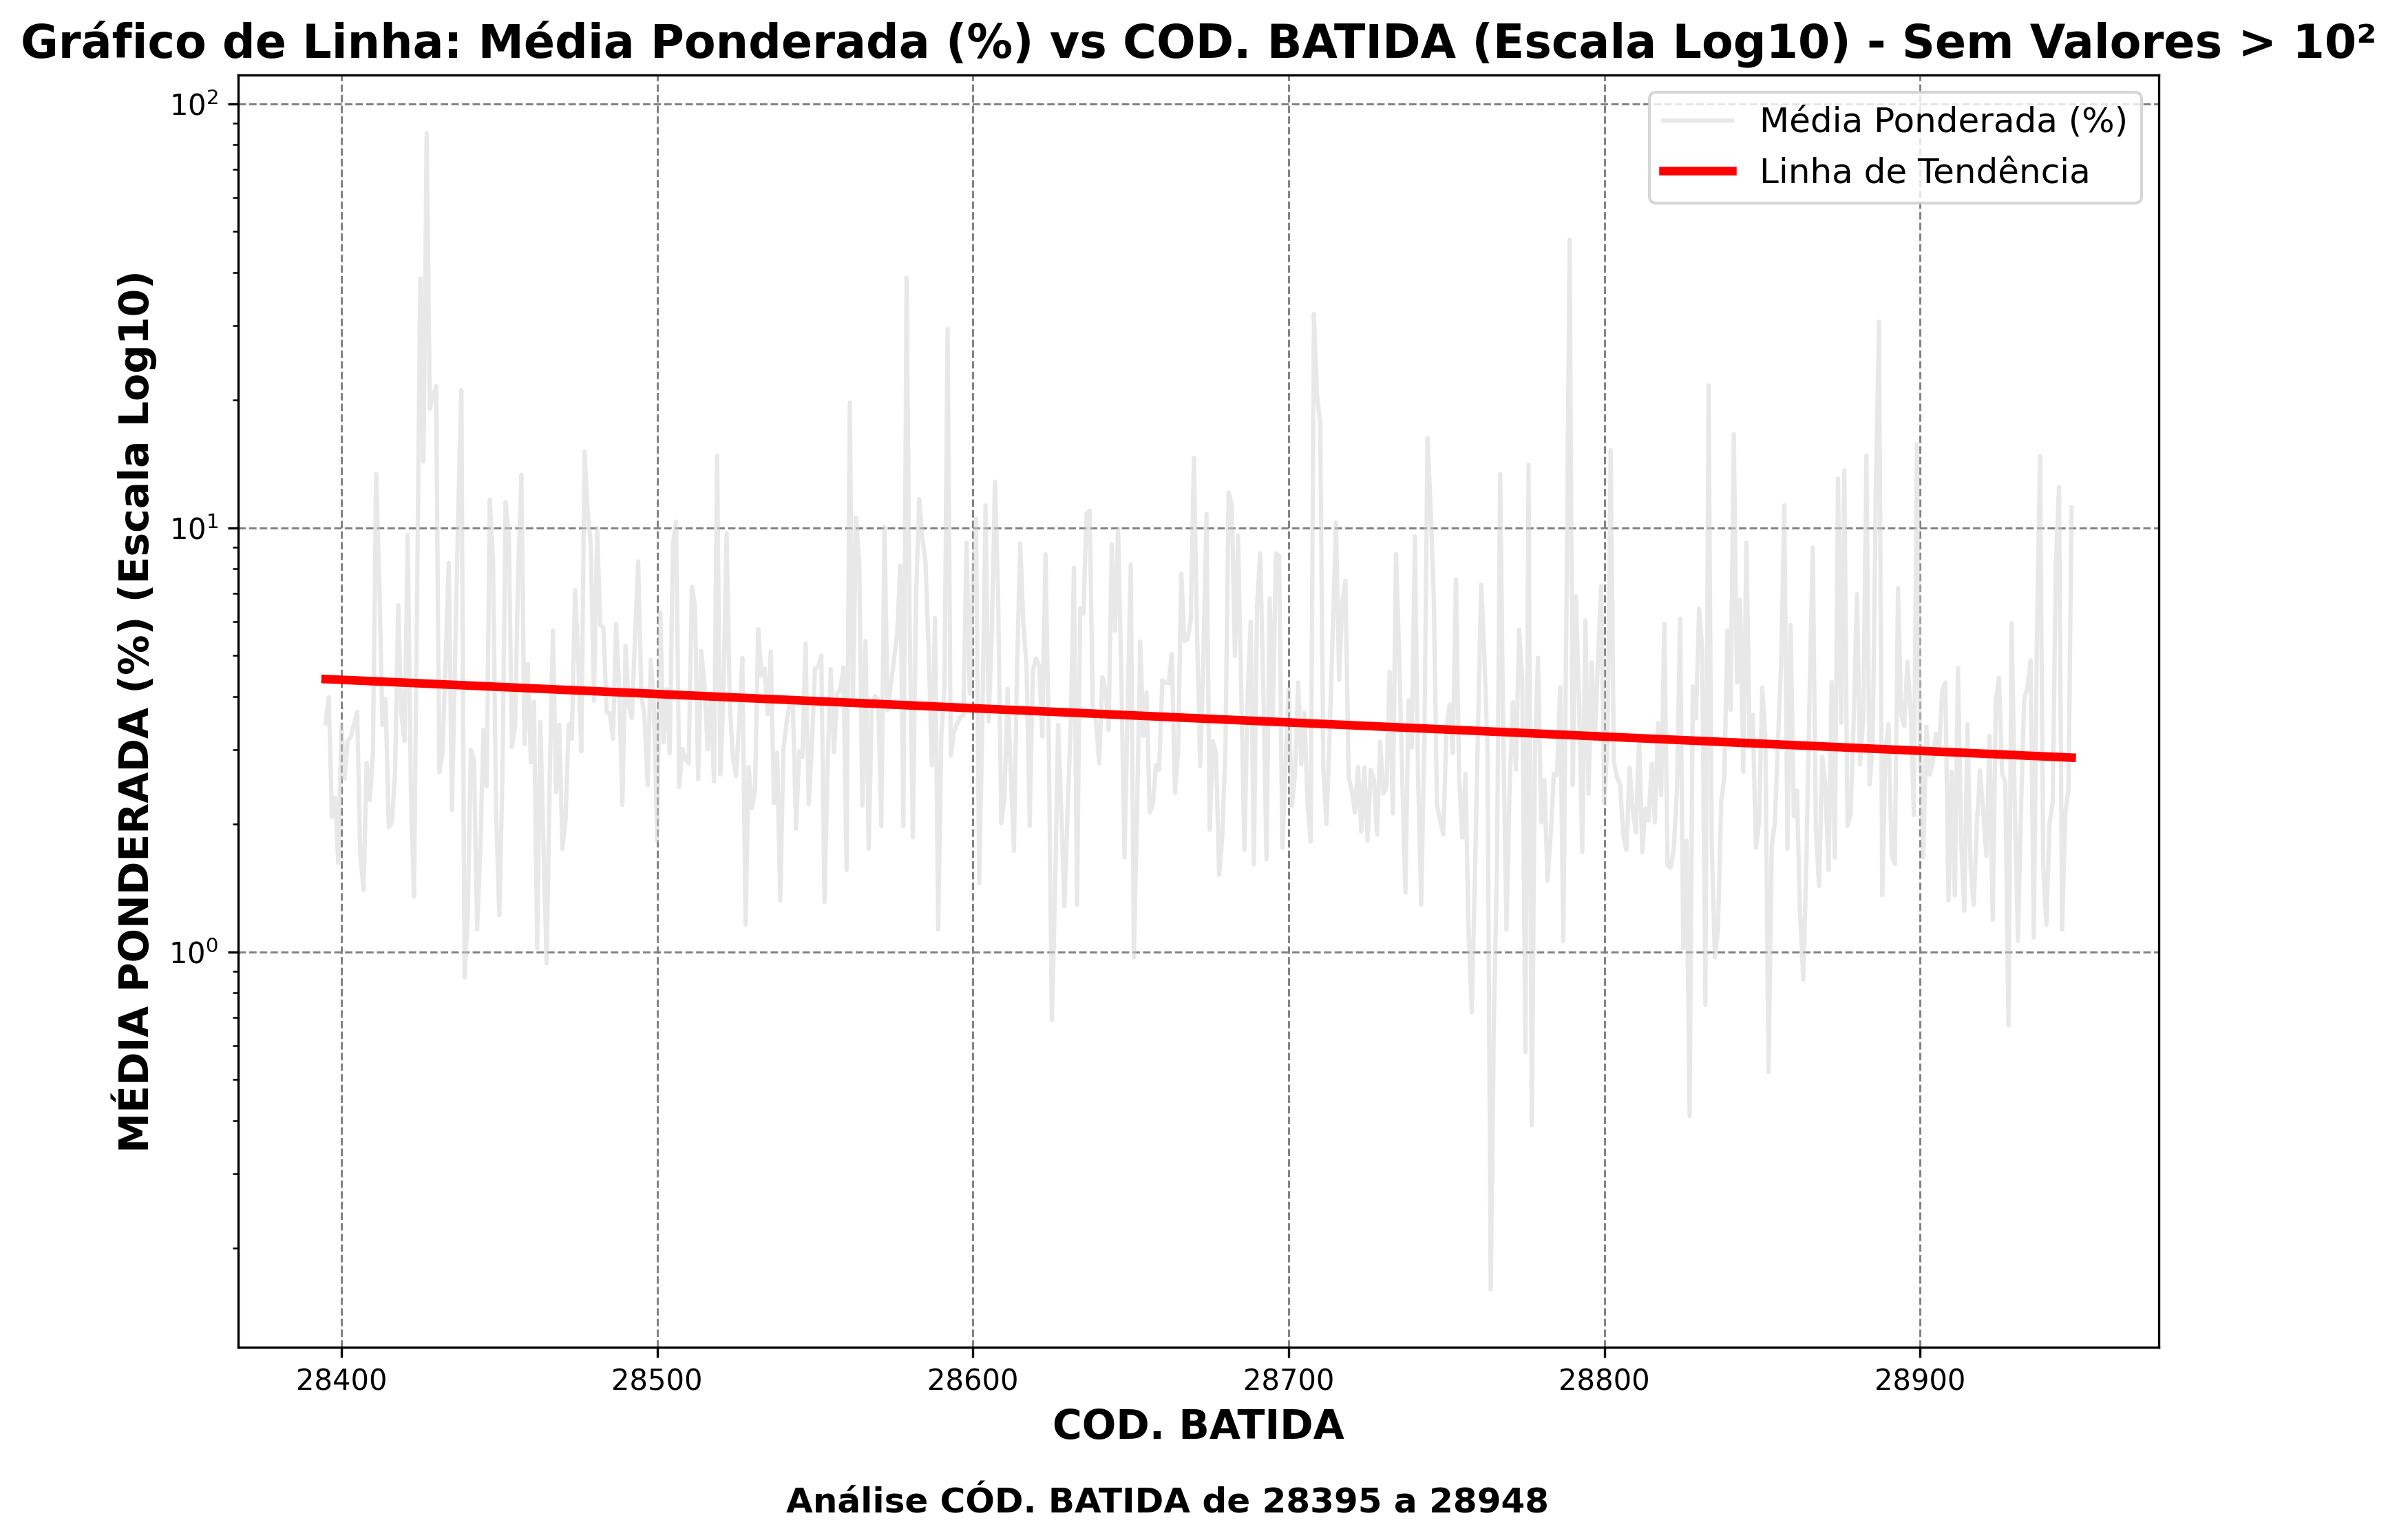

In [1]:
# Importar bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import os

# Parte 1: Carregar e filtrar dados do Excel

# Definindo caminho para o arquivo na mesma pasta do programa
caminho_arquivo = os.path.join(os.getcwd(), "dados_processados.xlsx")
aba = "Dados Processados"

# Carregar os dados
if not os.path.isfile(caminho_arquivo):
    raise FileNotFoundError(f"Arquivo não encontrado: {caminho_arquivo}")

try:
    print(f"Carregando dados do arquivo: {caminho_arquivo}")
    xls = pd.ExcelFile(caminho_arquivo, engine='openpyxl')
    print(f"Abas disponíveis no arquivo: {xls.sheet_names}")
    df = pd.read_excel(xls, sheet_name=aba)
except PermissionError as e:
    raise PermissionError(f"Permissão negada ao tentar acessar o arquivo: {caminho_arquivo}. Verifique as permissões do arquivo.")
except Exception as e:
    raise Exception(f"Erro inesperado ao carregar o arquivo Excel: {str(e)}")

# Filtrar os dados removendo outliers
limite_outlier = 100
df_filtrado = df[df["MÉDIA PONDERADA (%)"] <= limite_outlier]

# Verificar tipos de dados
df_filtrado["COD. BATIDA"] = pd.to_numeric(df_filtrado["COD. BATIDA"], errors='coerce')
df_filtrado = df_filtrado.dropna(subset=["COD. BATIDA"])

# Lidar com valores zero ou negativos
df_filtrado = df_filtrado[df_filtrado["MÉDIA PONDERADA (%)"] > 0]

# Parte 2: Calcular a linha de tendência

# Função para calcular a linha de tendência usando regressão linear
coluna_x = "COD. BATIDA"
coluna_y = "MÉDIA PONDERADA (%)"

z = np.polyfit(df_filtrado[coluna_x], np.log10(df_filtrado[coluna_y]), 1)
linha_tendencia = np.poly1d(z)

# Parte 3: Criar e visualizar o gráfico
titulo = "Gráfico de Linha: Média Ponderada (%) vs COD. BATIDA (Escala Log10) - Sem Valores > 10²"
periodo_inicio = df_filtrado["COD. BATIDA"].iloc[0]
periodo_fim = df_filtrado["COD. BATIDA"].iloc[-1]
periodo_texto = f"Análise CÓD. BATIDA de {periodo_inicio} a {periodo_fim}"

plt.figure(figsize=(12, 8), dpi=300)

# Plotar a linha dos dados filtrados com cor cinza claro e transparência
plt.plot(
    df_filtrado[coluna_x],
    df_filtrado[coluna_y],
    label="Média Ponderada (%)",
    color="lightgray",  # Cor cinza claro
    alpha=0.5,          # Transparência
    linewidth=1.5,
)

# Configurar o eixo Y para escala logarítmica
plt.yscale("log")

# Plotar a linha de tendência
plt.plot(
    df_filtrado[coluna_x],
    10 ** linha_tendencia(df_filtrado[coluna_x]),
    color="red",
    linestyle="-",
    linewidth=3.0,
    label="Linha de Tendência",
)

# Configurar elementos visuais do gráfico
plt.title(titulo, fontsize=16, fontweight="bold")
plt.xlabel(coluna_x, fontsize=14, fontweight="bold")
plt.ylabel(f"{coluna_y} (Escala Log10)", fontsize=14, fontweight="bold")
plt.legend(fontsize=12)
plt.grid(True, linestyle="--", linewidth=0.7, color="gray")
plt.gca().set_facecolor("white")

# Inserir o texto do período na margem inferior
plt.figtext(0.5, 0.01, periodo_texto, ha="center", fontsize=12, fontweight="bold")

# Parte 4: Salvar e mostrar o gráfico
data_producao = datetime.now().strftime("%Y-%m-%d")
caminho_saida = os.path.join(os.getcwd(), f"../confinamento_batidas_trendline/trendline_{data_producao}.png")

# Criar diretório de saída se não existir
os.makedirs(os.path.dirname(caminho_saida), exist_ok=True)

# Salvar o gráfico antes de exibir
try:
    plt.savefig(caminho_saida, format="png", bbox_inches="tight", pad_inches=0.2)
    print(f"Gráfico salvo em: {caminho_saida}")
except PermissionError:
    print(f"Permissão negada ao tentar salvar o arquivo: {caminho_saida}. Verifique as permissões do diretório.")
except Exception as e:
    print(f"Erro inesperado ao salvar o gráfico: {str(e)}")

# Mostrar o gráfico
plt.show()

# Fechar o gráfico para liberar recursos
plt.close()